# Temperature

Temperature is a concept that is used when you need to generate a random number from a probability vector.

In [1]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Let's create a probability vector!  
A probability vector is a vector where the sum of all value equal 1.

<IPython.core.display.Javascript object>


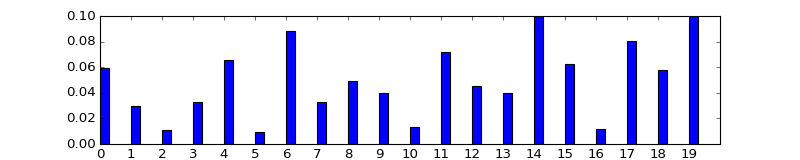

In [2]:
SIZE = 20
prob = np.random.uniform(low=0.0, high=1.0, size=SIZE)
prob = prob/np.sum(prob)

x = range(0,len(prob))
plt.figure(figsize=(10,2))
plt.bar(x, prob, 0.3)
plt.xticks(x, x)
plt.show()

Using np.random.choice you can use the probability vector to pick random number that will follow the distribution described in the probability vector.

The histogram looks the same as the probabilty vector:

<IPython.core.display.Javascript object>


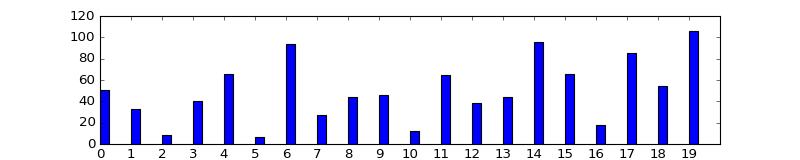

In [3]:
result = np.zeros_like(prob)
for i in range(1000):
    value =  np.random.choice(range(len(prob)),p=prob)
    result[value] += 1
    
plt.figure(figsize=(10,2))
plt.bar(x, result, 0.3)
plt.xticks(x, x)
plt.show()


Now let's define a sample fonction that will do the same than np.random.choice, but will have a 'temperature' parameter.

[source](http://stackoverflow.com/questions/36609920/tensorflow-using-lstms-for-generating-text)

In [4]:
def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.log(a) / temperature
    a = np.exp(a) / np.sum(np.exp(a))
    return np.argmax(np.random.multinomial(1, a, 1))

When temperature equal 1, sample function behave exactly like np.random.choice.  

But when temperature is lower, sample most likly pick number witch have the highest probability and ignore more often the ones with low proability.

<IPython.core.display.Javascript object>


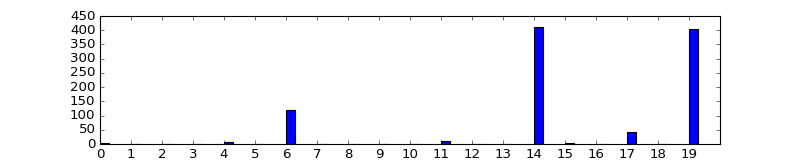

In [5]:
result_temperature = np.zeros_like(prob)
for i in range(1000):
    value =  sample(prob,temperature=0.1)
    result_temperature[value] += 1
    
plt.figure(figsize=(10,2))
plt.bar(x, result_temperature, 0.3)
plt.xticks(x, x)
plt.show()

http://stackoverflow.com/questions/36609920/tensorflow-using-lstms-for-generating-text

Temperature is usefull in RNN, when you want to pick the most probable next char.